In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import pandas as pd
import numpy as np
import pylab as plt
%pylab inline
import re

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


## Подготовка данных к классификации и предворительный анализ

**Загрузка:** Первый набор данных data содержит информацию о документах в системе электронного документооборота. Элементы данного набора послужат обьектами дя обучения и содержат целевые значения модели.

In [2]:
data = pd.read_csv('C:/Users/MsSurgeon/Documents/BeelineHW/Data/DocHist/doc.txt',\
                   delimiter='\t', parse_dates=['Create_Date'])

In [3]:
data.rename(columns={'\xef\xbb\xbfid_doc': 'id_doc'}, inplace=True)
data['HistoryPerson_plan_list'] = data['HistoryPerson_plan_list'].astype(str)
data.index = np.arange(0, len(data))

In [4]:
for col in data.columns:
    print("{0}, num. NA's: {1}".format(col, pd.isnull(data[col]).sum()))

id_doc, num. NA's: 0
Create_Date, num. NA's: 0
Author_Department, num. NA's: 0
Author_Sex, num. NA's: 0
Author_Born_In_Moscow, num. NA's: 0
Author_IsMoscow, num. NA's: 0
Author_Kids_Count, num. NA's: 0
Author_Experience_years, num. NA's: 0
Author_Department_Level, num. NA's: 0
Author_SalNorm, num. NA's: 0
ContentType_Category, num. NA's: 0
ContentType, num. NA's: 0
HistoryPerson_Count, num. NA's: 0
HistoryPerson_plan_count, num. NA's: 0
HistoryPerson_plan_list, num. NA's: 0
Process_duration_hours, num. NA's: 0
Transition_count, num. NA's: 0
Cycle_Count, num. NA's: 0


Заполним отсутствующие значения нулем

In [86]:
data['HistoryPerson_plan_list'].fillna('0', inplace=True)

In [87]:
data.head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
id_doc,8ED3F3E5FD02D80A43257E6C0046BF9D,8F018A360FCE4A8B43257E60002C1432,8F45DC2158DA4DCE43257DF90035C747,916D12AB91F2FB0A43257E3E00367EE5,93251AA5421E757443257DF9003424C3,94C50E545B97D5CA43257E68003492A4,98AA7BEE8AA69E4543257E2000371186,98F101BEF130CA3043257E5E00346150,9A61DAD3423FFC7943257E5F004EDF23,9AB11D6388BA879D43257E180041DE5D,...,35BF578DFD3D594B43257E22003829E9,360334A81D0227C143257E14002F08EE,37A05FD30510F00443257E27004FB962,37AFBF64934BD93C43257E50004E5589,39EA8AC06554D7A443257E61002F1D1C,3AA75BD982316BED43257E60003C3EF0,3B289A69ADB44FF343257E6000571BA6,3B650B911E916C4643257E2F00427279,3BC8BE4A499D5CB743257E670051AFF6,3D1E3C2A9C8A5AD343257E49004E35BD
Create_Date,2015-06-22 15:52:45,2015-06-10 11:01:27,2015-02-27 12:47:24,2015-05-07 12:55:14,2015-02-27 12:29:32,2015-06-18 12:34:14,2015-04-07 13:01:29,2015-06-08 12:32:07,2015-06-09 17:21:29,2015-03-30 14:59:27,...,2015-04-09 13:13:27,2015-03-26 11:33:44,2015-04-14 17:30:48,2015-05-25 17:15:37,2015-06-11 11:34:36,2015-06-10 13:58:02,2015-06-10 18:51:27,2015-04-22 15:05:46,2015-06-17 17:52:14,2015-05-18 17:14:15
Author_Department,"Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""",...,"Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр"""
Author_Sex,0,0,0,0,1,1,0,1,1,1,...,0,1,1,0,1,1,0,0,1,1
Author_Born_In_Moscow,1,0,1,1,0,0,1,0,0,0,...,1,0,1,1,0,0,0,1,0,0
Author_IsMoscow,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Author_Kids_Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Author_Experience_years,2.7,1.1,2.7,2.7,2.5,2.5,2.7,2.5,2.5,2.5,...,2.7,2.5,0.5,2.7,2.5,2.5,1.1,2.7,2.5,2.5
Author_Department_Level,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Author_SalNorm,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


 **id_doc** - уникальный номер,посредством которого будет осуществлятся связка между таблицами  
**Create_Date** - документа  
**Author_Department** - есть предположение, что может существовать корреляция между временем обработки и подразделением, так как между подразделениями существуют как формальные, так и неформальные связи.
К сожалению, подразделений достаточно много, однако каждое подразделение имеет свое место в иерархии, которому задается значение **Author_Department_Levelv**

Всего подразделений представлено в выборке

In [88]:
data.groupby('Author_Department').size().shape

(136L,)

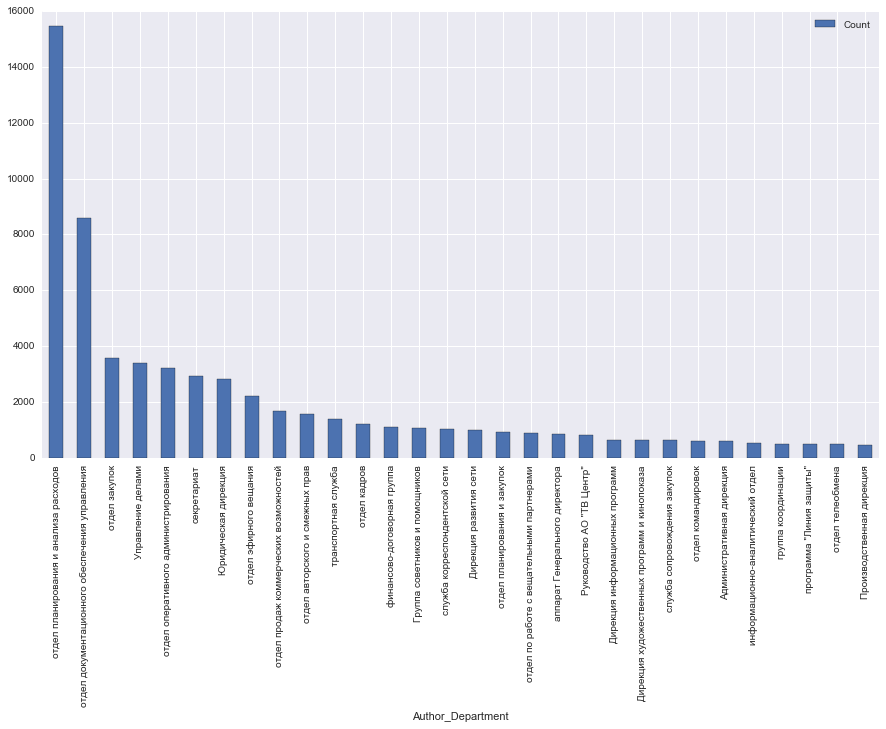

In [89]:
data.groupby('Author_Department')['Create_Date']\
        .agg({'Count' : 'count'}).sort('Count', ascending=0).head(30).plot(kind='bar',figsize=(15,8))

**Author_Department_Level** - уровень автора в иерархии, предполагается, что чем выше уровень, тем меньше сопротивления автор и его документ будут испытывать  

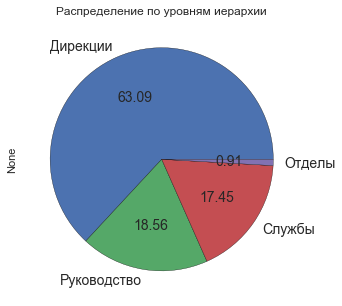

In [90]:
data.groupby('Author_Department_Level').size().sort(inplace=False, ascending=False).plot(kind='pie', \
                                    figsize=(5,5), rot=0, fontsize=14, title = u'Распределение по уровням иерархии',\
                                    labels=[u'Дирекции', u'Руководство', u'Службы', u'Отделы'],\
                                    autopct='%.2f')

**Author_Sex** - как можем заметить ниже, немного у нас женщин инициируют документы  
**Author_Experience_years** - опыт работы, возможно чем больше опыт работы, тем разнообразней сеть неформальных связей  
**Author_SalNorm** - Нормированная З/П автора. Чем выше З/П, тем выше авторитет  
**Author_IsMoscow** - Признак родного города  
**Author_Kids_Count** - Количество детей у автора

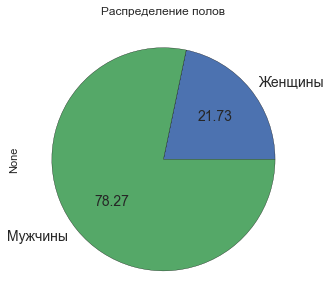

In [91]:
data.groupby('Author_Sex').size().plot(kind='pie', \
                                    figsize=(5,5), rot=0, fontsize=14, title = u'Распределение полов',\
                                    labels=[u'Женщины', u'Мужчины'],\
                                    autopct='%.2f')

In [92]:
data.groupby('Author_IsMoscow').size()

Author_IsMoscow
0    10883
1    63679
dtype: int64

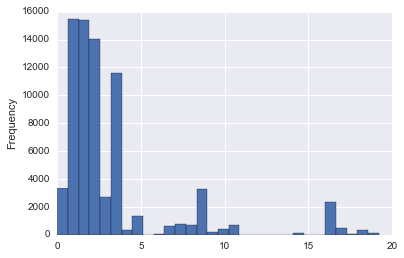

In [93]:
data['Author_Experience_years'].plot.hist(bins=30)

Заметим, что как ни странно существует небольшая корреляция между количеством детей и проталкиванием документа по маршруту

In [94]:
(data['Process_duration_hours']/data['Transition_count']).corr(data['Author_Kids_Count'])

0.15914966243953682

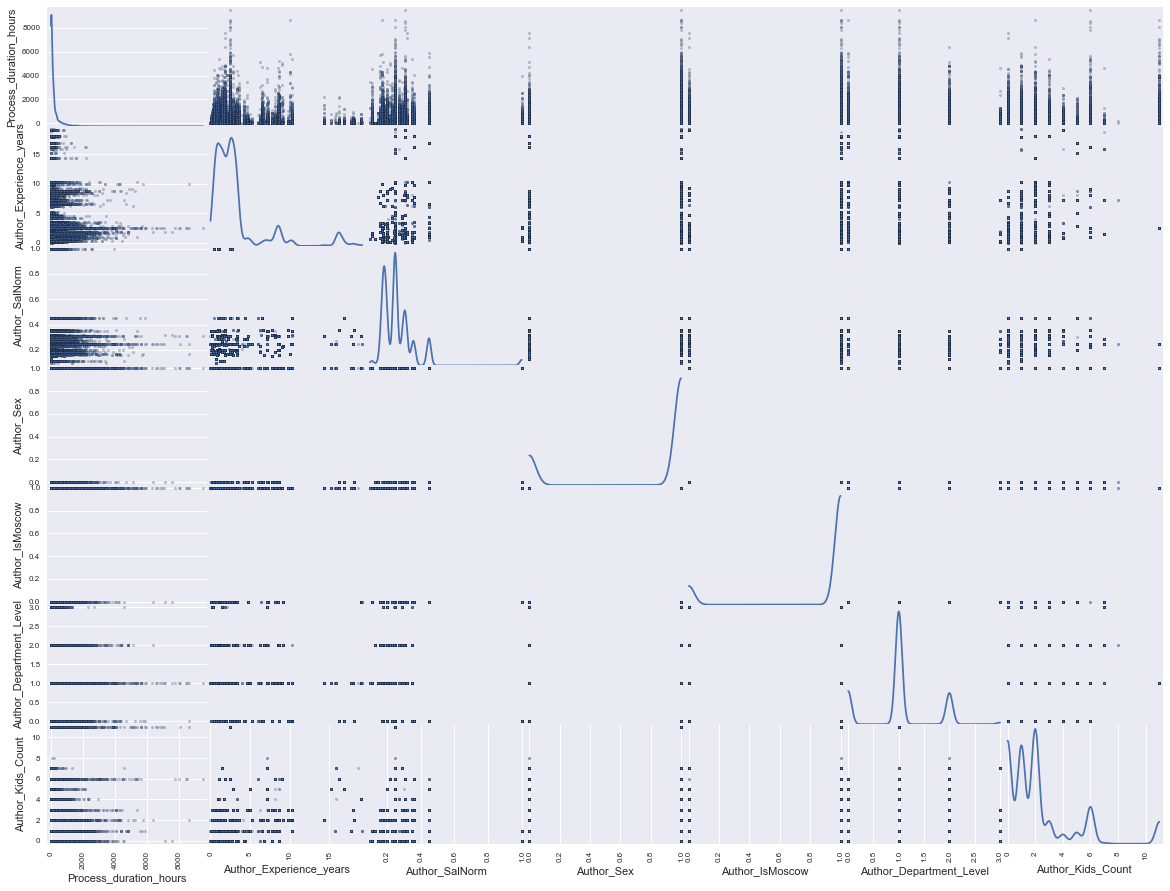

In [15]:
matrix = pd.scatter_matrix(data[['Process_duration_hours', 'Author_Experience_years','Author_SalNorm','Author_Sex',\
                       'Author_IsMoscow','Author_Department_Level', 'Author_Kids_Count']],\
                  alpha=0.4, figsize=(20, 15), diagonal='kde', grid=True)

**ContentType_Category** - Категория типа документа  
**ContentType** - Наименование типа документа. Предполагается, что чем сложнее документ "Тендерная документация" тем больше конфликтов и разногласий он вызывает.

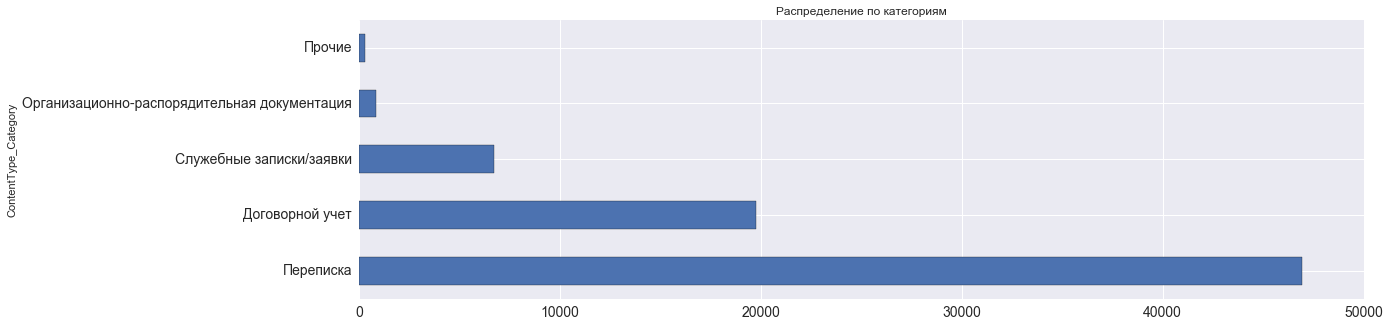

In [95]:
data.groupby('ContentType_Category').size().sort(inplace=False, ascending=False).plot(kind='barh',figsize=(18,5), \
                                                    rot=0, fontsize=14, title = u'Распределение по категориям')

Но к сожалению самих КТ многовато

In [96]:
data['ContentType'].describe()

count         74562
unique           41
top       Поручение
freq          37163
Name: ContentType, dtype: object

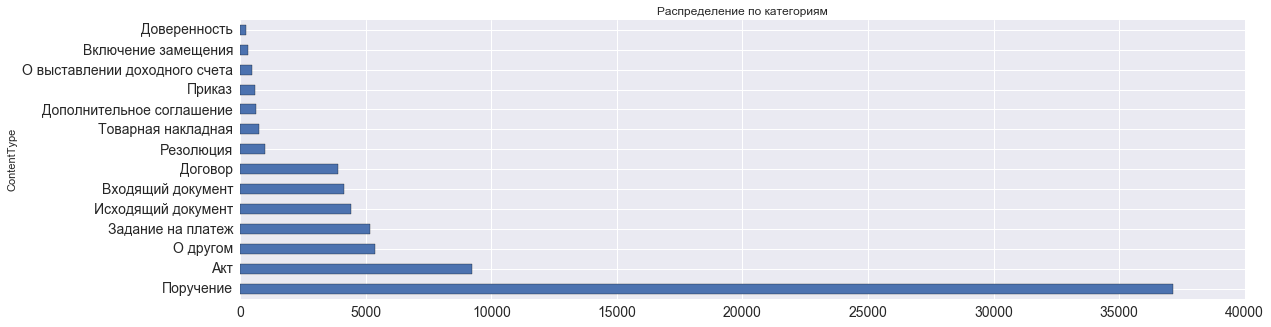

In [98]:
data.groupby('ContentType').size().sort(inplace=False, ascending=False).head(14).plot(kind='barh',figsize=(18,5), \
                                                    rot=0, fontsize=14, title = u'Распределение по категориям')

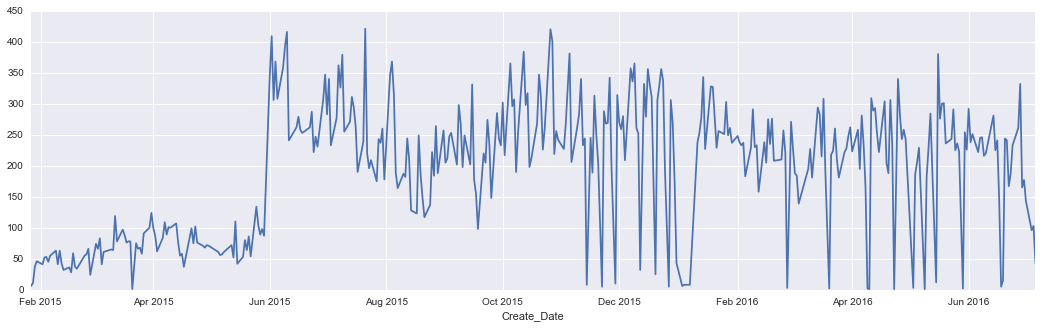

In [99]:
data.groupby(data['Create_Date'].dt.date).size().plot(figsize=(18,5))

На временном графике видно, что имеет место всплеск в район начала 15 года, скорей всего это миграция данных из другой системы. Полагаем, что от этих данных лучше избавиться. Так же заметна низкая активнсость что скорей всего связано с ОПЭ.

In [100]:
data = data[data['Create_Date'] > pd.to_datetime('2015-08-01')]

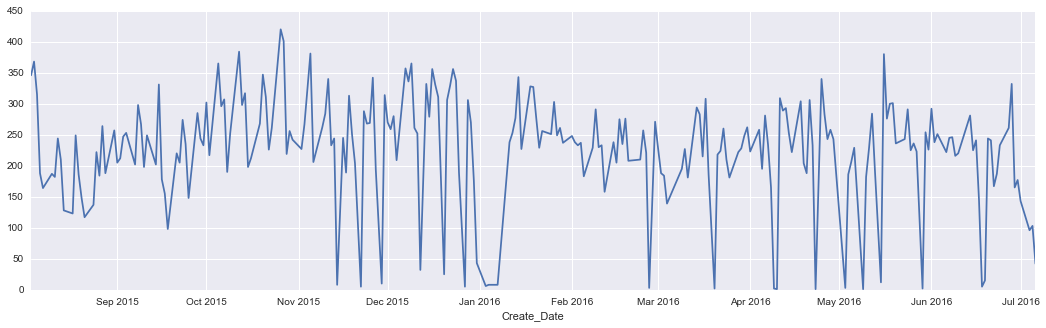

In [101]:
data.groupby(data['Create_Date'].dt.date).size().plot(figsize=(18,5))

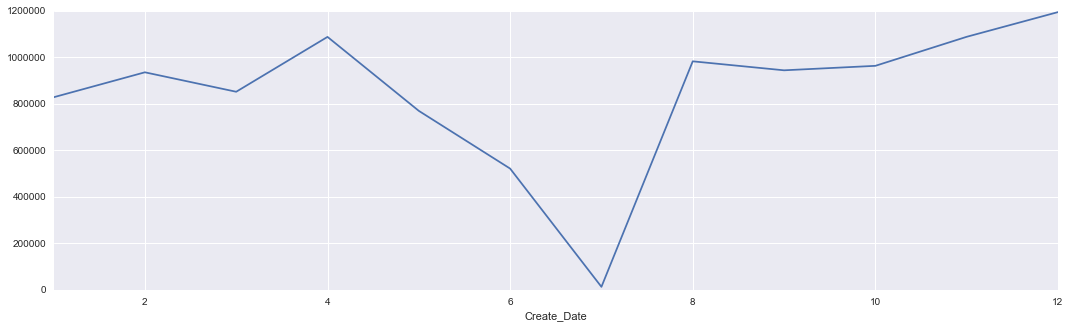

In [102]:
data.groupby(data['Create_Date'].dt.month)['Process_duration_hours'].sum().plot(figsize=(18,5))

Как можно заметить на графике выше существует сезонность, перед новым годом и перед отпуском все хотят согласовать свои документы и продолжительность согласования из за очередей повышаеться, а в августе и сентебре все в отпуска и документ проскакивает без препядственно

**HistoryPerson_plan_count** - Начальное количетво пользователей которое будет вовлечено в процесс. Во время прохождения по маршруту предпологаеться что будут добовляться ответственные и согласующие,следовательно будет возможность уточнять оставшееся время. Часто это зависит от уровня пользователя инициирующего документ чем она ниже (значение выше), тем больше руководителей инициатора должнобудет принять участие в согласовании.   
**HistoryPerson_plan_list** - Список ID согласующих по умолчанию

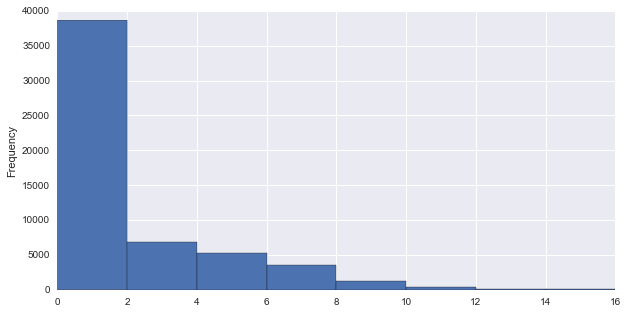

In [103]:
data['HistoryPerson_plan_count'].plot.hist(bins=8, figsize=(10,5))

### Теперь давайте посмотрим на целевые переменные  
**Process_duration_hours** - Прогнозируемое значение, демонстрирующее время, потраченное на обработку документа

In [104]:
data[['Process_duration_hours', 'Transition_count', 'Cycle_Count']].describe()

,Process_duration_hours,Transition_count,Cycle_Count
count,56266.000000,56266.000000,56266.000000
mean,180.872980,5.528579,0.176412
std,354.631925,4.016947,0.638649
min,0.000000,1.000000,0.000000
25%,17.400000,3.000000,0.000000
50%,67.200000,3.000000,0.000000
75%,175.900000,8.000000,0.000000
max,5687.500000,78.000000,20.000000


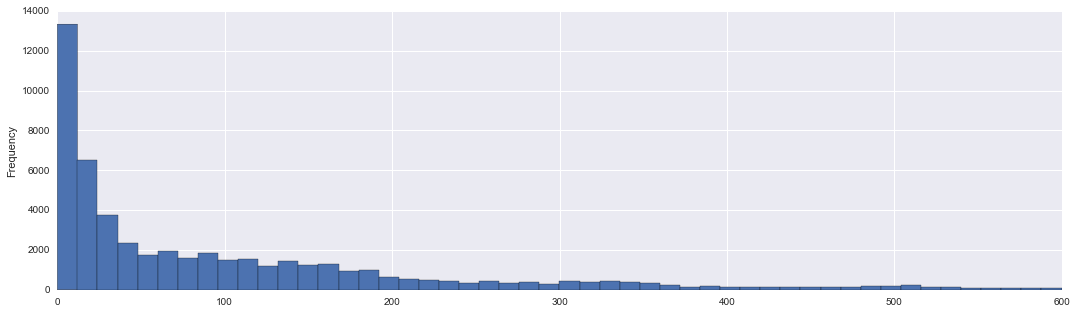

In [105]:
data['Process_duration_hours'][data['Process_duration_hours']<600].plot.hist(bins=50, figsize=(18,5))

Также в выборке предсатвлены еще две переменных, являющиеся целевыми, которые могут быть найдены в процесе поиска **Process_duration_hours**:  
**Transition_count** - количество изменений статуса документа в процессе прохождения жихненого цикла от "новый" к "в архиве"   
**Cycle_Count** - число возвратов документа в процессе жизненого цикла на доработку  
**HistoryPerson_Count** - фактическое количество сотрудников принявших участие в оработке документа

In [106]:
data[['Transition_count', 'Cycle_Count']].describe()

,Transition_count,Cycle_Count
count,56266.000000,56266.000000
mean,5.528579,0.176412
std,4.016947,0.638649
min,1.000000,0.000000
25%,3.000000,0.000000
50%,3.000000,0.000000
75%,8.000000,0.000000
max,78.000000,20.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002EAA7978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002502EEB8>]], dtype=object)

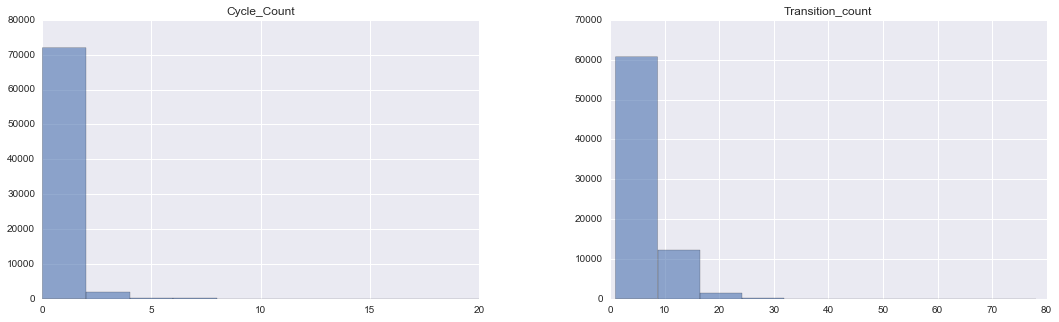

In [44]:
data[[u'Transition_count', u'Cycle_Count']].hist(alpha=0.6, bins=10, figsize=(18,5))

Интересно сопоставить начальное количество согласующих с итоговым

In [108]:
(data['HistoryPerson_plan_count']).corr(data['HistoryPerson_Count'])

0.95331469241614231

Что и требовалось доказать, а теперь посмотрим как коррелирует уровень инициатора в иерархии и количество согласующих

In [109]:
(data['Author_Department_Level']).corr(data['HistoryPerson_Count'])

0.37738245425348138

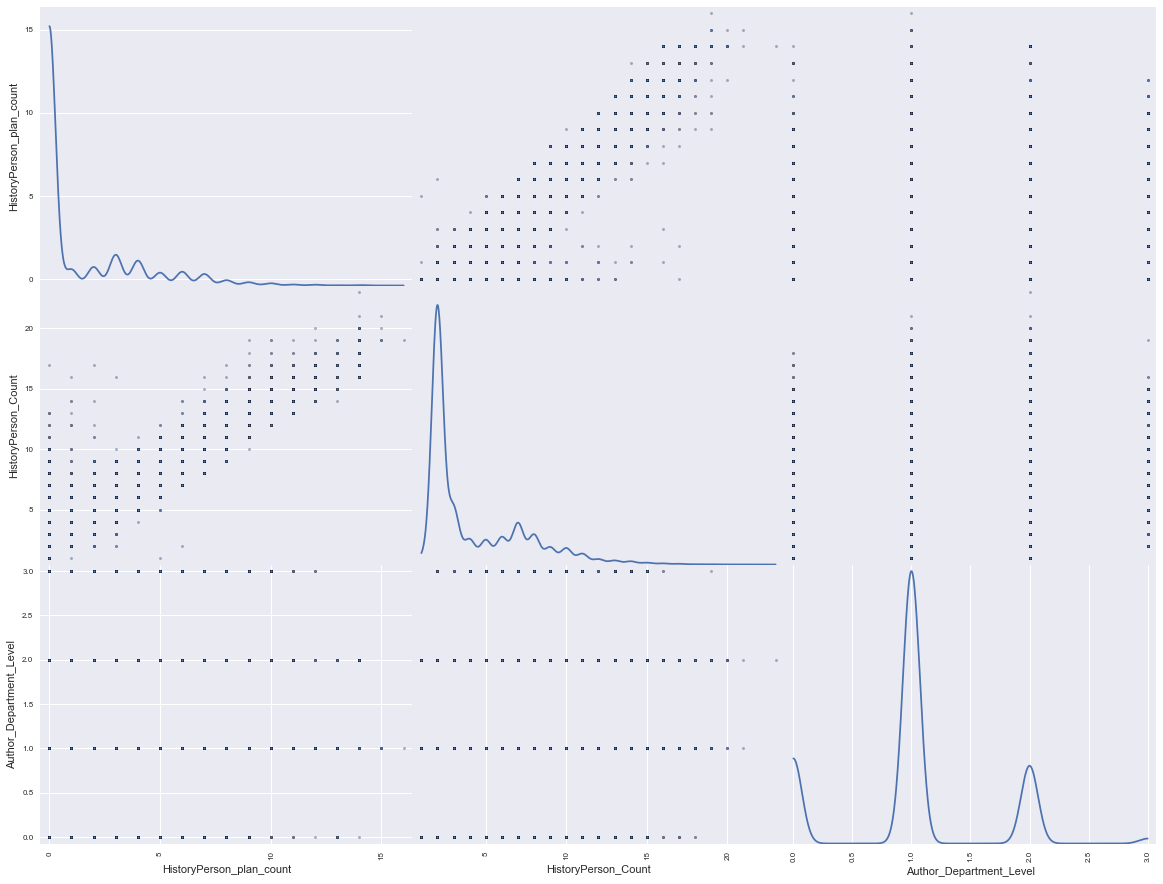

In [30]:
matrix = pd.scatter_matrix(data[['HistoryPerson_plan_count', 'HistoryPerson_Count','Author_Department_Level']],\
                  alpha=0.5, figsize=(20, 15), diagonal='kde', grid=True)

**Загрузка:** - во втором наборе мы найдем информацию об смене состояний документа от проекта до архива, людей, ответственных за переход и их персональные данные. Мы попробуем извлечь из таблицы данные и привнести их в основную таблицу. Предполагаеться, что на основе данной таблицы возможно сформировать рейтинг пользователей по числу возвратов документов на дороботку и по продолжительности и ипользовать рейтинг при анализе, так как нам часто известно на начальном этапе, кто будет участвовать в процессе

In [110]:
dataH = pd.read_csv('C:/Users/MsSurgeon/Documents/BeelineHW/Data/DocHist/dochist.txt', sep='\t')

In [111]:
dataH.rename(columns={'\xef\xbb\xbfid_doc': 'id_doc'}, inplace=True)

In [112]:
dataH = dataH.drop(dataH[['Document_docUniq','HistoryDate']], axis=1)
dataH['Approver_Auto_card'] = dataH['Approver_Auto_card'].astype(str)

In [113]:
for col in dataH.columns:
    print("{0}, num. NA's: {1}".format(col, pd.isnull(dataH[col]).sum()))

id_doc, num. NA's: 0
Approver_Department, num. NA's: 0
Approver_Sex, num. NA's: 0
Approver_Experience_years, num. NA's: 0
Approver_Department_Level, num. NA's: 0
Approver_SalNorm, num. NA's: 0
Current_Stage, num. NA's: 0
Next_Stage, num. NA's: 0
Move_Name, num. NA's: 0
Approver_Auto_card, num. NA's: 0
Cycle, num. NA's: 0
Current_time_minute, num. NA's: 0


In [114]:
dataH.head(3).T

,0,1,2
id_doc,3D005EE3E8139A1F43257E3400445FED,813A35FC42AFE7FB43257DE000355BCA,DA62ED78B69ADFB843257EFB004C0E7D
Approver_Department,"Руководство ОАО ""ТВ Центр""","Руководство ОАО ""ТВ Центр""","Руководство АО ""ТВ Центр"""
Approver_Sex,0,0,1
Approver_Experience_years,2.7,2.7,1
Approver_Department_Level,0,0,0
Approver_SalNorm,1,1,0.88
Current_Stage,Согласование,Исполнение,Согласование
Next_Stage,Архив,Проверка и снятие с контроля,Согласование
Move_Name,В архив выполненных,"Задание выполнено, передать на снятие с контроля",Документ согласован: отправить следующему
Approver_Auto_card,9454,9454,10148


**Approver_Department**  
**Approver_Sex**  
**Approver_Experience_years**  
**Approver_Department_Level**  
**Approver_SalNorm**  
Параметры выше эквивалента персональным данным описанным для автора документа, однако они свойственны ответственному за переход

**Current_Stage** - Состояние в котором документ находился до перехода   
**End_Stage** - Состояние в которое документ перешол 
**Move_Name** - Наименование причины перехода  

**Approver_Auto_card** - ID ответственного аз переход  
**Current_time_minute** - время потраченное на обработку стадии
**Cycle** - Признак перехода "возврата на доработку".

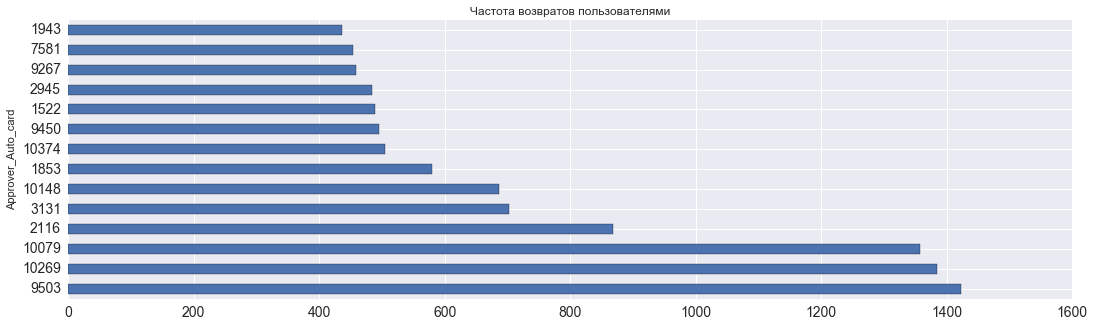

In [115]:
#Частота возвратов документов для ID пользователя
dataH[dataH['Cycle']==1].groupby('Approver_Auto_card', as_index=False)\
                    .size().sort(inplace=False, ascending=False).head(14).plot(kind='barh',figsize=(18,5), \
                                                    rot=0, fontsize=14, title = u'Частота возвратов пользователями')

А теперь посмотрим кто больше всех сумарно в часах потратил времени на обработку и кто в среднем дольше обрабатывает

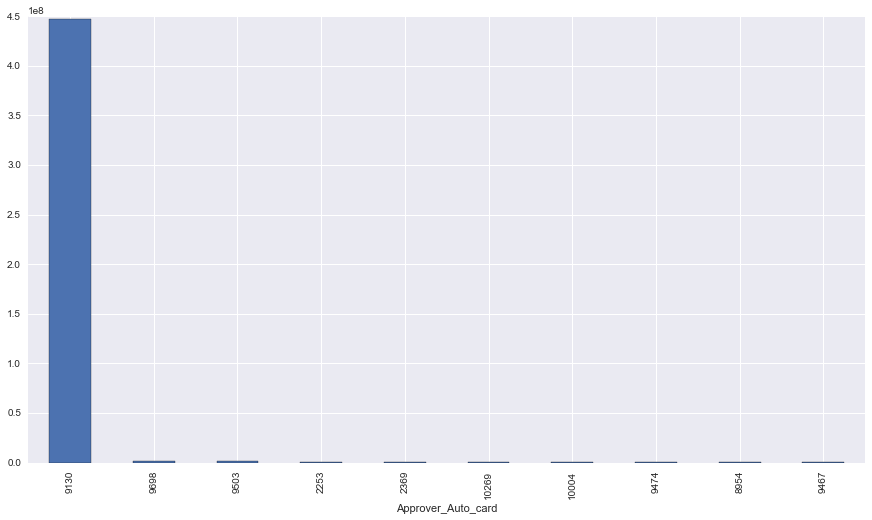

In [116]:
(dataH.groupby('Approver_Auto_card')['Current_time_minute'].sum()/60).\
                sort(inplace=False, ascending=False).head(10).plot(kind='bar',figsize=(15,8))

Похоже это выброс, и имеет место избавиться от документов в которых администратор системы являеться согласующим

In [117]:
dataF = dataH[dataH['Approver_Auto_card'] != '9130']

In [118]:
mask = dataH.isin(dataF)
dataH = dataH[mask]

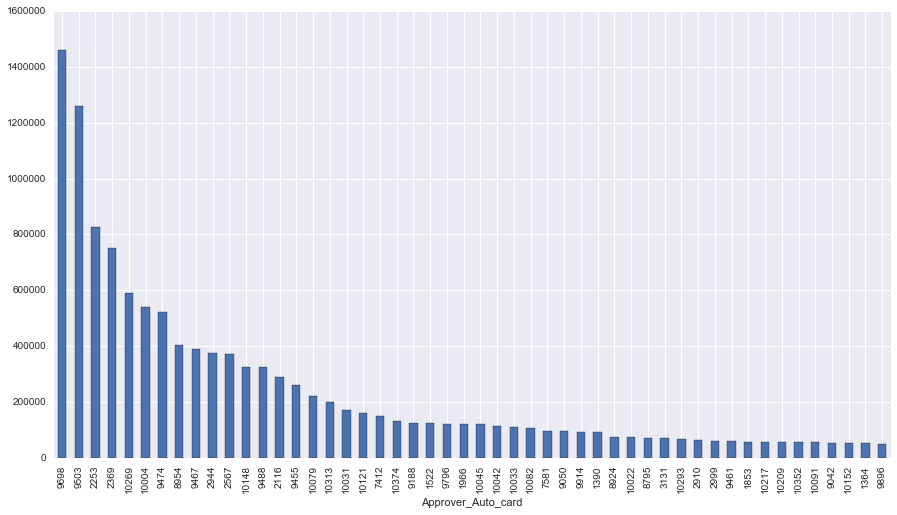

In [119]:
(dataH.groupby('Approver_Auto_card')['Current_time_minute'].sum()/60).\
                sort(inplace=False, ascending=False).head(50).plot(kind='bar',figsize=(15,8))

Так гораздо льчьше. А теперь посмотрим средние расходуемое время а обработку, по ответственному и его подразделению

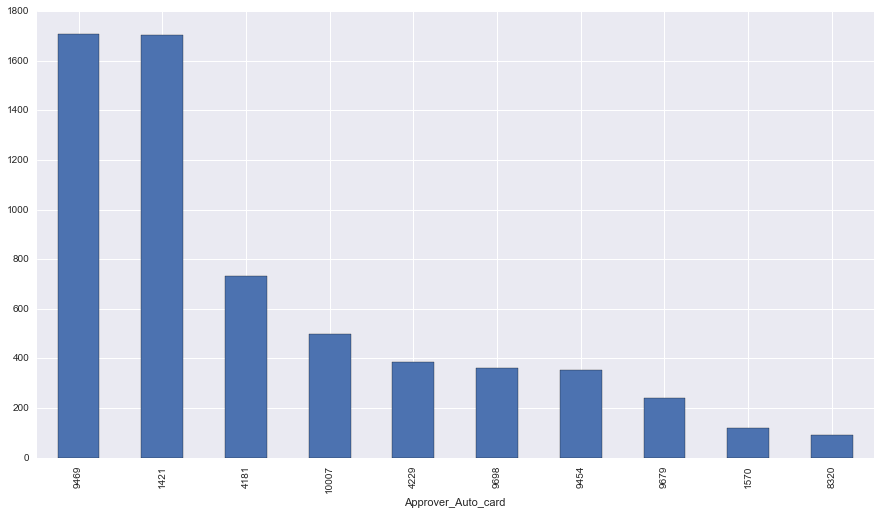

In [120]:
(dataH.groupby('Approver_Auto_card')['Current_time_minute'].median()/60).\
                sort(inplace=False, ascending=False).head(10).plot(kind='bar',figsize=(15,8))

Топ 10 не расторопных согласующих. Однако это может быть связано просто не высокой волеченностью данных подразделений

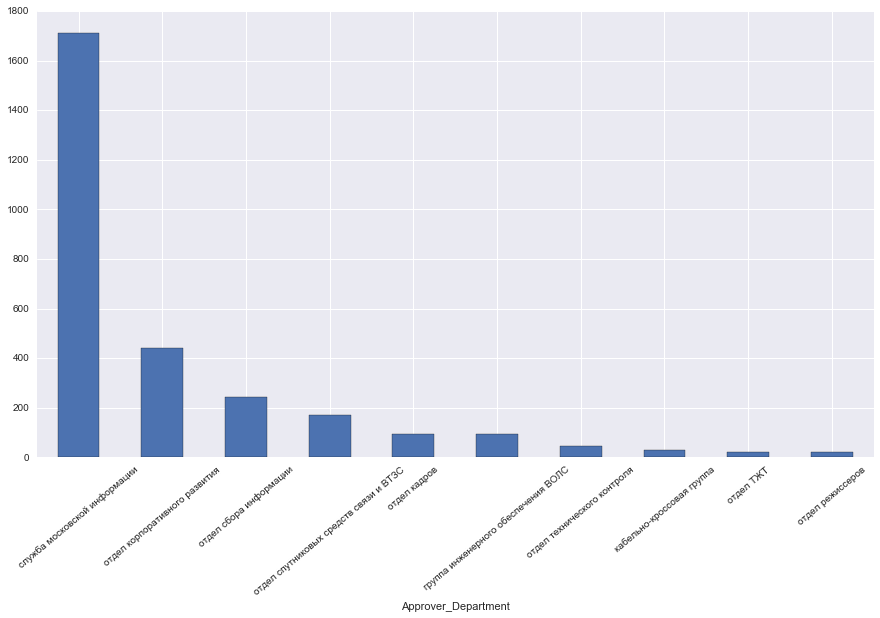

In [121]:
(dataH.groupby('Approver_Department')['Current_time_minute'].median()/60).\
                sort(inplace=False, ascending=False).head(10).plot(kind='bar', rot=40,figsize=(15,8))

Посмотрим какой пол чаще возращает документы

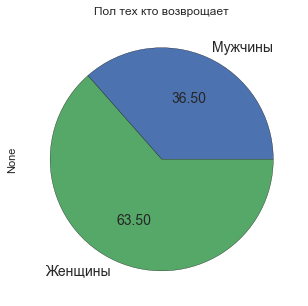

In [122]:
dataH[dataH['Cycle']==1].groupby('Approver_Sex', as_index=False).size().\
            plot(kind='pie', figsize=(5,5),rot=0, fontsize=14, labels=[u'Мужчины', u'Женщины'],\
                          autopct='%.2f', title = u'Пол тех кто возврощает')

Интересно, что при небольшом числе женщин, инициирующих документы, именно женщины въедливее в их оформлении

Как мы и планировали создадим признаки на базе таблицы истории. Сечас мы добавим значения на базе предворительного списка согласующих. Однако после первой регресии мы сможем добавить новые признаки

In [123]:
data.groupby('HistoryPerson_plan_list').size().sort(inplace=False, ascending=False).head(15)

HistoryPerson_plan_list
nan                                       36693
9688~10269~10148                            618
9503                                        543
8954~10148                                  446
9688~10148                                  373
10269                                       370
10042~10033~10148~9488                      363
1387~10374~9467                             279
7656~7622~2944                              279
1387~10374~9467~10148~10269~10082           257
10042~10033                                 257
2994~7623                                   227
10042                                       223
8954~2116~10079~10269~10148~9488~10004      213
8954~10269~10148                            211
dtype: int64

Уберем не связанные документы

In [124]:
data = data[data['id_doc'].isin(dataH['id_doc'])]

Признаки суммы среденего и медианного времени согласования плановым списком согласования

In [125]:
dataF = dataH.groupby('Approver_Auto_card')['Current_time_minute'].median().reset_index(name='Median')
def MedianTimeByAprPlan(row):
    sumMedianByApr = 0
    for apr in row.split('~'):
        MedianByApr = 0
        if apr != 'nan' and apr != '':
             MedianByApr = dataF[dataF['Approver_Auto_card'] == apr]['Median']._values
             if (MedianByApr):
                sumMedianByApr = sumMedianByApr + MedianByApr[0]
    return round(sumMedianByApr/60,1)
data['MedianTime_by_Apr_plan'] = data['HistoryPerson_plan_list'].apply(MedianTimeByAprPlan)

In [126]:
dataF = dataH.groupby('Approver_Auto_card')['Current_time_minute'].mean().reset_index(name='Mean')
def MeanTimeByAprPlan(row):
    sumMeanByApr = 0 
    for apr in row.split('~'):
        MeanByApr = 0
        if apr != 'nan' and apr != '':
             MeanByApr = dataF[dataF['Approver_Auto_card'] == apr]['Mean']._values
             if (MeanByApr):
                sumMeanByApr = sumMeanByApr + MeanByApr[0]
    return round(sumMeanByApr/60,1)
data['MeanTime_by_Apr_plan'] = data['HistoryPerson_plan_list'].apply(MeanTimeByAprPlan)

Признаки суммы среденего и медианного количества возвратов участниками планового списка согласования

In [127]:
dataF = dataH.groupby(['Approver_Auto_card', 'id_doc'])['Cycle'].sum().reset_index(name='Sum')
def MeanCycleByAprPlan(row):
    meanCycleByApr = 0
    for apr in row.split('~'):
        if apr != 'nan' and apr != '':
            meanCycleByApr = meanCycleByApr\
                + dataF[dataF['Approver_Auto_card']== apr]['Sum'].mean()
    return round(meanCycleByApr,2)
data['MeanCycle_by_Apr_plan'] = data['HistoryPerson_plan_list'].apply(MeanCycleByAprPlan)

Создадим признак месяц (подрозумеевая что в переиуд отпусков согласование быстее, а перед новым годом затрудняеться)

In [128]:
data['CreateMonth'] = data['Create_Date'].dt.month

Сохраним модель на диске

In [4]:
#data.index = np.arange(0, len(data))
#data.to_csv('preprocessed_data.csv', sep='\t',index=False)
data = pd.read_csv('C:/Users/MsSurgeon/Documents/BeelineHW/preprocessed_data.csv',delimiter='\t')

Выделим целевые признаки

In [5]:
y_dur = data['Process_duration_hours']
y_tr = data['Transition_count']
y_pc = data['HistoryPerson_Count']
y_cyl = data['Cycle_Count']

Создадим два масив переменных чем и определим последовательность работы алгоритма

In [6]:
y = [y_pc, y_tr,y_cyl,y_dur]
y_lable = ['HistoryPerson_Count_pr', 'Transition_count_pr',\
         'Cycle_Count_pr', 'Process_duration_hours_pr']

In [7]:
le = LabelEncoder()
data[['Author_Department', 'ContentType_Category', 'ContentType']] = \
    data[['Author_Department', 'ContentType_Category', 'ContentType']].apply(le.fit_transform)

In [8]:
data = data.drop(['id_doc', 'Create_Date', 'HistoryPerson_Count', 'HistoryPerson_plan_list', 'Process_duration_hours',\
              'Transition_count', 'Cycle_Count'], axis=1)

In [9]:
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize, scale
from sklearn.cross_validation import KFold, train_test_split,cross_val_score
from sklearn.metrics import log_loss
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV

from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve

## Преступим к классификации

Были испробованы множественные подходы, но к сожалению не все инструментарии одинаково надежны. Использование библиотеки hyperopt, обнаруживает следующую проблему. В гипер пространство параметров попадаю значения за диапазоном заданных. В частности в  hp.choice('max_depth', list(range(1,20))) возрощает в том числе 0, что не верно!!!

Score for HistoryPerson_Count_pr is: 0.143991044636 with params: {'max_depth': 17, 'min_samples_leaf': 4}


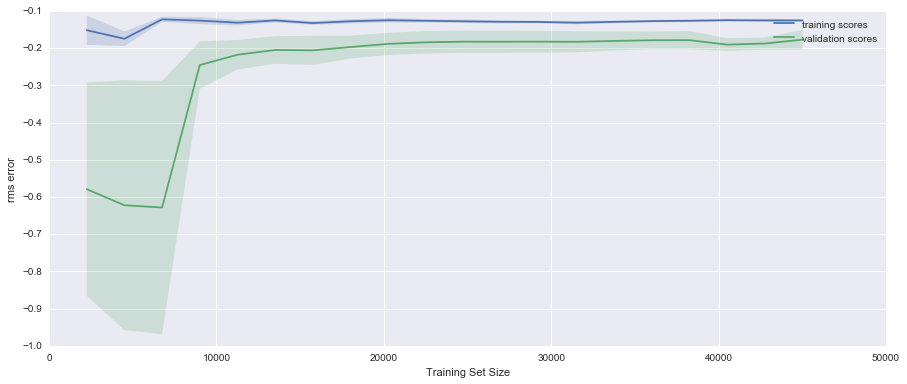

Score for Transition_count_pr is: 1.6787926664 with params: {'max_depth': 7, 'min_samples_leaf': 8}


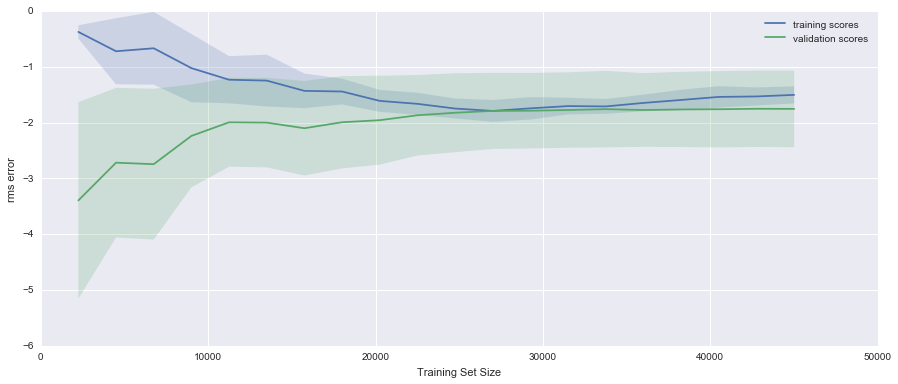

Score for Cycle_Count_pr is: 0.253638479516 with params: {'max_depth': 5, 'min_samples_leaf': 2}


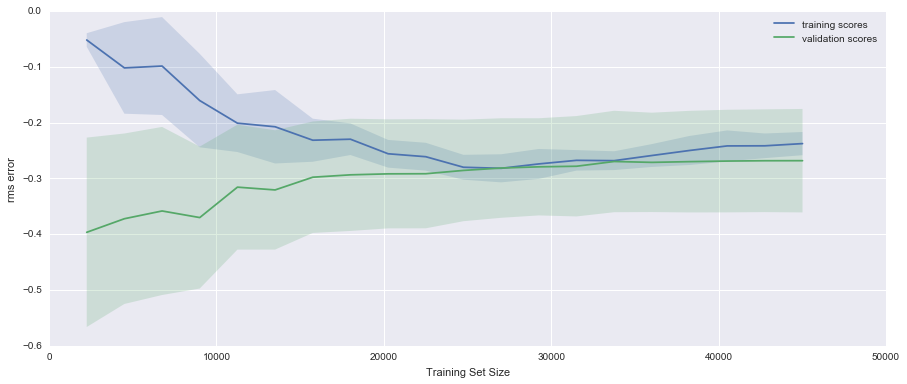

Score for Process_duration_hours_pr is: 68216.0447967 with params: {'max_depth': 19, 'min_samples_leaf': 7}


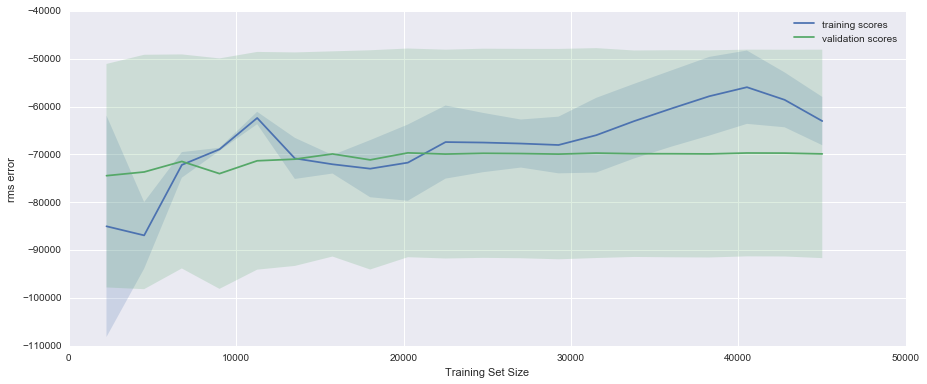

In [59]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
'''
def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))
#Зададим пространство параметров
space4rf = {
    'max_depth': hp.choice('max_depth', list(range(1,20))),
    'min_samples_leaf': hp.choice('min_samples_leaf', list(range(1,10)))}
def f(params):
    global best
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
def hyperopt_train_test(params):
    clf = RandomForestRegressor(**params)
    return cross_val_score(clf, data, y[var_y],scoring=rms_error).mean()
    
        #Расчитаем случайны лес для лучьших параметров
    forest = RandomForestRegressor(max_depth= best.get('max_depth'),\
                                    min_samples_leaf= best.get('min_samples_leaf'),\
                                    n_estimators = 150,\
                                    random_state=555)
                                    
    print ('Score for ' + y_lable[var_y] + ' is: ' + str(cross_val_score(forest, data, y[var_y]).mean()) +\
                                                                          ' with params ' + str(best))
    
    best = 0
    trials = Trials()
    best = fmin(f, space4rf, algo=tpe.suggest, max_evals=50, trials=trials)                                                                
'''
#////////////////////////////////////////////////////////////////////////////////////////////////
for var_y in range(len(y)):

    clf_params = [{'max_depth': list(range(1,20)), 'min_samples_leaf': list(range(1,10))}]
    
    forest = GridSearchCV(RandomForestRegressor(n_estimators = 100,random_state=555),clf_params,\
                                                  scoring="mean_squared_error",cv=5)
    forest.fit(data,y[var_y])
#////////////////////////////////////////////////////////////////////////////////////////////////
    print ('Score for '  + y_lable[var_y] + ' is: ' + str(forest.score(data, y[var_y])*(-1)) + 
           ' with params: ' + str(forest.best_params_))
#////////////////////////////////////////////////////////////////////////////////////////////////

#////////////////////////////////////////////////////////////////////////////////////////////////    
#    print (pd.DataFrame(forest.feature_importances_, columns=['Importance'],
#             index=data.columns).sort_values(by='Importance', ascending=False))
#////////////////////////////////////////////////////////////////////////////////////////////////    
    #Добавим выход классификатора как новый признак для следующей итерации классификации 
    y_p = pd.DataFrame({y_lable[var_y] : forest.predict(data).round()}, dtype='int')
    data = pd.concat([data, y_p], axis=1)
#////////////////////////////////////////////////////////////////////////////////////////////////    
    #Валидационные кривые для каждой итерации
    train_sizes = np.linspace(0.05, 1, 20)
    N_train, val_train, val_test = learning_curve(RandomForestRegressor(max_depth=forest.best_params_.values()[0],\
                                                    min_samples_leaf=forest.best_params_.values()[1],\
                                                    n_estimators = 100,\
                                                    random_state=555),\
                                                    data, y[var_y], train_sizes, cv=5,\
                                                    scoring="mean_squared_error")
#////////////////////////////////////////////////////////////////////////////////////////////////    
    plt.figure(var_y + 1,figsize=(15, 6))
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    plt.legend()
    plt.show()
    

Из валидационных кривых видно что количество данных для первых трех целий достаточно, что касаеться предсказания продолжительности, то возможно есть необходимость усложнять модель, однако надо не забывать что мы расчитываем значения пологаясь уже на предсказания а не факты... Думаю существующая сложность достаточна с условиями что данная модель будет возрощать значения по мере движения документа по БП. Следовательно результат будет уточняться...

In [21]:
data = data.drop(['HistoryPerson_Count_pr', 'Transition_count_pr',\
         'Cycle_Count_pr', 'Process_duration_hours_pr'], axis=1)